In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
'formats':('U10', 'i4', 'f8')})

In [7]:
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [9]:
names = ['Alice', 'Bob', 'Cathy', 'Doug']
ages = [25, 45, 37, 19]
weights = [55.0, 85.5, 68.0, 61.5]

data['name'] = names
data['age'] = ages
data['weight'] = weights
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [15]:
# Get names where age is under 30
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

In [17]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19])

In [23]:
pd?

Type:        module
String form: <module 'pandas' from 'C:\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>
File:        c:\anaconda3\lib\site-packages\pandas\__init__.py
Docstring:  
pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted and deleted from Da

In [65]:
area_dict = {'California': 423967, 'Texas': 695662, 'Florida': 170312,
'New York': 141297, 'Pennsylvania': 119280}
area = pd.Series(area_dict)
print(area, end='\n\n')

population_dict = {'California': 39538223, 'Texas': 29145505,
'Florida': 21538187, 'New York': 20201249,
'Pennsylvania': 13002700}
population = pd.Series(population_dict)
population

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
dtype: int64



California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
dtype: int64

In [99]:
states = pd.DataFrame({
    'area':area,
    'population':population
})
states

,area,population
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187
New York,141297,20201249
Pennsylvania,119280,13002700


In [69]:
states.columns

Index(['population', 'area'], dtype='object')

In [55]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

indA.intersection(indB)

Index([3, 5, 7], dtype='int64')

In [57]:
indA.union(indB)

Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [59]:
indA.symmetric_difference(indB)

Index([1, 2, 9, 11], dtype='int64')

In [101]:
states['density'] = states['population'] / states['area']
states

,area,population,density
California,423967,39538223,93.257784
Texas,695662,29145505,41.896072
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120
Pennsylvania,119280,13002700,109.009893


In [115]:
states.loc[:'Florida', :'density']

,area,population,density
California,423967,39538223,93.257784
Texas,695662,29145505,41.896072
Florida,170312,21538187,126.463121


In [129]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [131]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

C:\Users\Muyoba Lutlas\AppData\Local\Temp\ipykernel_19872\619644514.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [133]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

C:\Users\Muyoba Lutlas\AppData\Local\Temp\ipykernel_19872\2603839867.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [135]:
births = pd.read_csv('births.csv')

In [140]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [142]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender',
aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

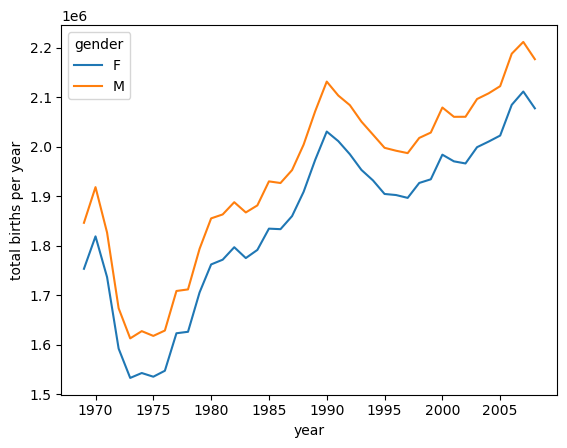

In [158]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')